Initial Data Overview:
   GridId                  Toid  GRID_ExactCut_ID Location_ExactCut  \
0    6256  osgb4000000027865913                27          External   
1    6428  osgb4000000027865914                45          External   
2    6600  osgb4000000027865915                74          External   
3    6772  osgb4000000027865916               106          External   
4    6256  osgb4000000027865917                27          External   

  BoroughName_ExactCut  DoT ID  Length (m) Emissions  Year Pollutant  ...  \
0               NonGLA   16001  117.662736       DFT  2016       CO2  ...   
1               NonGLA   16001  504.845737       DFT  2016       CO2  ...   
2               NonGLA   16001  511.909513       DFT  2016       CO2  ...   
3               NonGLA   16001   51.510888       DFT  2016       CO2  ...   
4               NonGLA   16001  114.435065       DFT  2016       CO2  ...   

  Road-Car-Diesel  Road-Car-Electric  Road-LGV-Petrol  Road-LGV-Diesel  \
0      166.33

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8991/8991 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.1756 - mae: 0.0704 - val_loss: 0.1686 - val_mae: 0.0464
Epoch 2/100
8991/8991 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.1253 - mae: 0.0459 - val_loss: 0.1635 - val_mae: 0.0469
Epoch 3/100
8991/8991 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 0.1489 - mae: 0.0464 - val_loss: 0.1635 - val_mae: 0.0480
Epoch 4/100
8991/8991 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - loss: 0.1377 - mae: 0.0456 - val_loss: 0.1633 - val_mae: 0.0493
Epoch 5/100
8991/8991 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - loss: 0.1095 - mae: 0.0436 - val_loss: 0.1625 - val_mae: 0.0455
Epoch 6/100
8991/8991 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.1451 - mae: 0.0467 - val_loss: 0.1633 - val_mae: 0.0464
Epoch 7/100
8991/8991 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.1390 - mae: 0.0448 - val_loss: 0.1621 - val_mae: 0.0468
Epoch 8/100
8991/8991 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.1328 - mae: 0.0443 - val_loss: 0.1627 - val_mae: 0.0460
Epoch 9/100
8991/8991 ━━━━━━━━━━━━━━

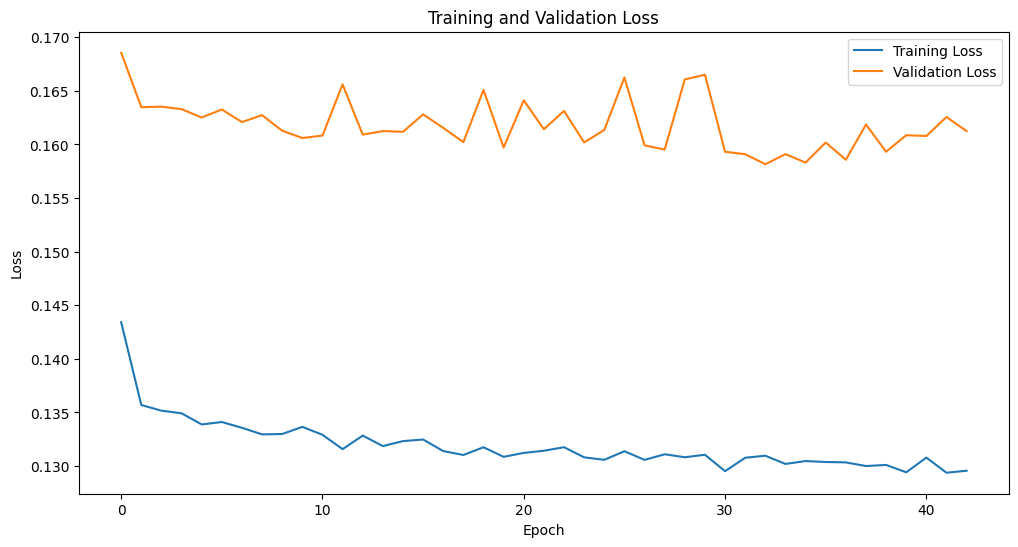

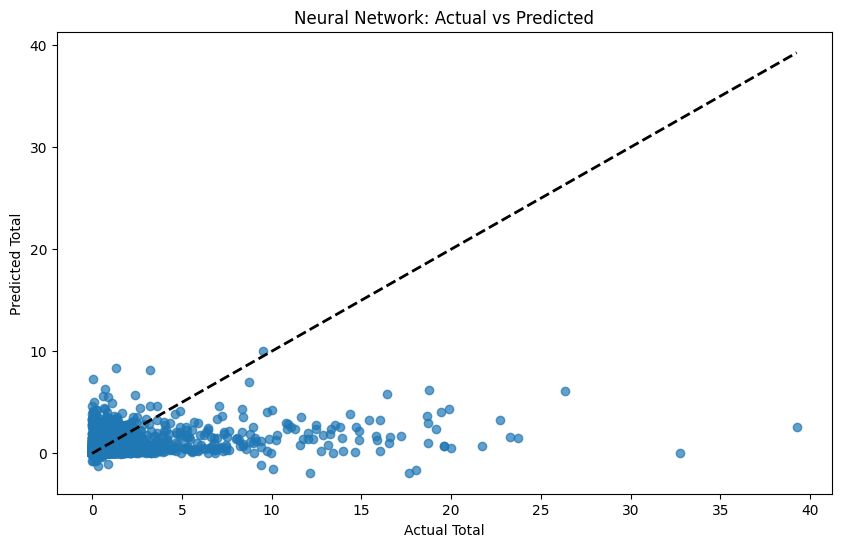

In [5]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load and Inspect the Data
data = pd.read_excel("/content/drive/MyDrive/dissertation_data/updated_2016_dataset_with_2019_columns.xlsx")  # Replace with your actual file path
print("Initial Data Overview:")
print(data.head())
print(data.info())

# Step 2: Preprocessing
print("\nMissing Values Before Processing:")
print(data.isnull().sum())

# Fill missing numerical values with the mean and categorical with the mode
for column in data.columns:
    if data[column].dtype == 'object':  # Categorical columns
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:  # Numerical columns
        data[column].fillna(data[column].mean(), inplace=True)

print("\nMissing Values After Processing:")
print(data.isnull().sum())

# Convert Year column to integer if it's in float format due to missing value handling
data['Year'] = data['Year'].astype(int)

# Step 3: Define Features and Target
X = data.drop(columns=['Total'])
y = data['Total']

# Define categorical and numerical columns
categorical_features = ['Pollutant', 'Emissions Unit', 'BoroughName_ExactCut']
numerical_features = [
    'Year', 'Road-Motorcycle', 'Road-Car-Taxi', 'Road-Car-Petrol', 'Road-Car-Diesel',
    'Road-Car-Electric', 'Road-LGV-Petrol', 'Road-LGV-Diesel', 'Road-LGV-Electric',
    'Road-Tfl-Bus', 'Road-Non-TfL-Bus-or-Coach', 'Road-HGV-Rigid', 'Road-HGV-Articulated'
]

# Column Transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # One-hot encode categorical features
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=X['Pollutant'])

# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert sparse matrices to dense arrays if necessary
X_train_processed = X_train_processed.toarray() if hasattr(X_train_processed, 'toarray') else X_train_processed
X_test_processed = X_test_processed.toarray() if hasattr(X_test_processed, 'toarray') else X_test_processed

# Neural Network Model
def build_nn_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['mae'])
    return model

# Build and train the neural network
nn_model = build_nn_model(X_train_processed.shape[1])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = nn_model.fit(
    X_train_processed, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Make predictions with neural network
nn_predictions = nn_model.predict(X_test_processed)

# Handle NaN values in predictions
if np.any(np.isnan(nn_predictions)):
    print("Warning: NaN values detected in neural network predictions")
    nn_predictions = np.nan_to_num(nn_predictions)

# Evaluation Metrics for Neural Network
mse_nn = mean_squared_error(y_test, nn_predictions)
mae_nn = mean_absolute_error(y_test, nn_predictions)
r2_nn = r2_score(y_test, nn_predictions)

print(f"\nNeural Network Evaluation Results:")
print(f"Mean Squared Error: {mse_nn}")
print(f"Mean Absolute Error: {mae_nn}")
print(f"R2 Score: {r2_nn}")

# Save evaluation metrics for Neural Network
evaluation_results = {'Neural Network': [mse_nn, mae_nn, r2_nn]}
results_df = pd.DataFrame(evaluation_results, index=['Mean Squared Error', 'Mean Absolute Error', 'R2 Score']).T
metrics_filename = 'Neural_Network_Evaluation_Metrics.csv'
results_df.to_csv(metrics_filename)
print(f"\nEvaluation metrics saved to {metrics_filename}")

# Save predictions for Neural Network
results_with_predictions = X_test.copy()
results_with_predictions['Actual_Total'] = y_test
results_with_predictions['Predicted_Total'] = nn_predictions
predictions_filename = 'Neural_Network_Predictions.csv'
results_with_predictions.to_csv(predictions_filename, index=False)
print(f"Predictions saved to {predictions_filename}")

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, nn_predictions, alpha=0.7)
plt.xlabel('Actual Total')
plt.ylabel('Predicted Total')
plt.title('Neural Network: Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()


In [6]:
# Import necessary module for downloading files
from google.colab import files



# Download the predictions CSV
files.download("/content/Neural_Network_Predictions.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>